### Audrey Gorter

# Decision Tree: A Graphical Example


In [309]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

# Functions to plot our points and draw the models
def plot_points(features, labels, size_of_points=100):
    # Convert the features and labels to NumPy array
    X = np.array(features)
    y = np.array(labels)
    # Separate the data into three classes based on the labels 
    class0 = X[np.argwhere(y==0)]
    class1 = X[np.argwhere(y==1)]
    class2 = X[np.argwhere(y==2)]
    # Create a scatter plot for each of the classes
    pyplot.scatter([s[0][0] for s in class0],
                   [s[0][1] for s in class0],
                   s = size_of_points,
                   color = 'red',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in class1],
                   [s[0][1] for s in class1],
                   s = size_of_points,
                   color = 'green',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.scatter([s[0][0] for s in class2],
                   [s[0][1] for s in class2],
                   s = size_of_points,
                   color = 'blue',
                   edgecolor = 'k',
                   marker = 'o')

def plot_model(X, y, model, size_of_points=100):
    feature_names = X.columns.tolist()
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    df_predict = pd.DataFrame({
        feature_names[0]: xx.ravel(),
        feature_names[1]: yy.ravel()
    })
    Z = model.predict(df_predict)
    Z = Z.reshape(xx.shape)
    colors = ['red', 'green', 'blue']
    pyplot.contourf(xx, yy, Z, colors=colors, alpha=0.2, levels=range(-1,3))
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y, size_of_points)
    pyplot.show()

def display_tree(dt):
    from io import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

## An Example Using the Iris Dataset

In [310]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
from sklearn import datasets

iris = datasets.load_iris()
dataset = pd.DataFrame(data= iris.data, columns= iris.feature_names)
dataset['species'] = iris.target
dataset

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
145        2  
146        2  
147        2  
148        2  
149        2  

[150 rows x 5 columns]

In [312]:
features1 = dataset[['sepal length (cm)', 'sepal width (cm)']]
features2 = dataset[['sepal length (cm)', 'petal length (cm)']]
features3 = dataset[['sepal length (cm)', 'petal width (cm)']]
features4 = dataset[['sepal width (cm)', 'petal length (cm)']]
features5 = dataset[['sepal width (cm)', 'petal width (cm)']]
features6 = dataset[['petal length (cm)', 'petal width (cm)']]
labels = dataset['species']

### Sepal Length vs. Sepal Width

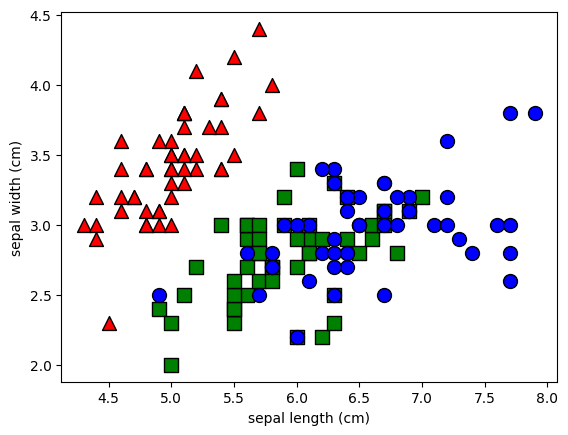

In [313]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('sepal width (cm)')
plot_points(features1, labels)

### Sepal Length vs. Petal Length

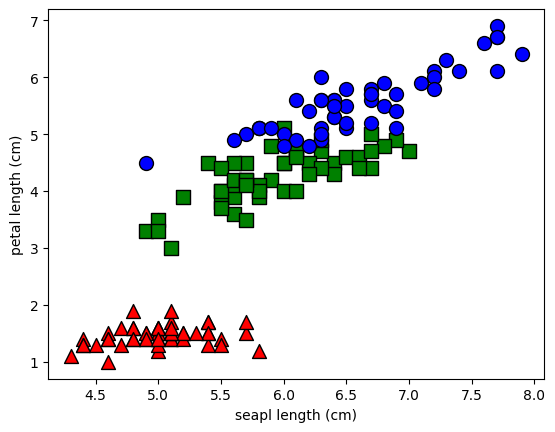

In [314]:
pyplot.xlabel('seapl length (cm)')
pyplot.ylabel('petal length (cm)')
plot_points(features2, labels)

### Sepal Length vs. Petal Width

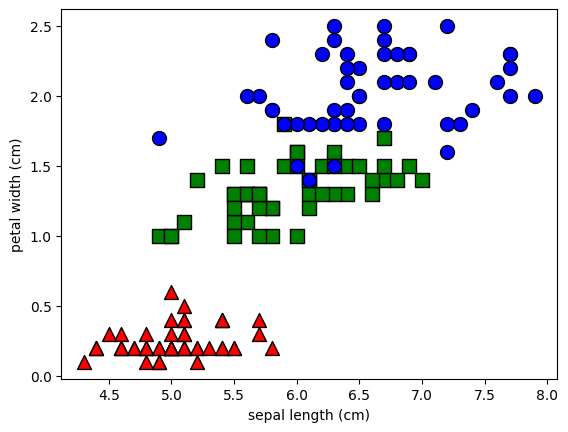

In [315]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_points(features3, labels)

### Sepal Width vs. Petal Length

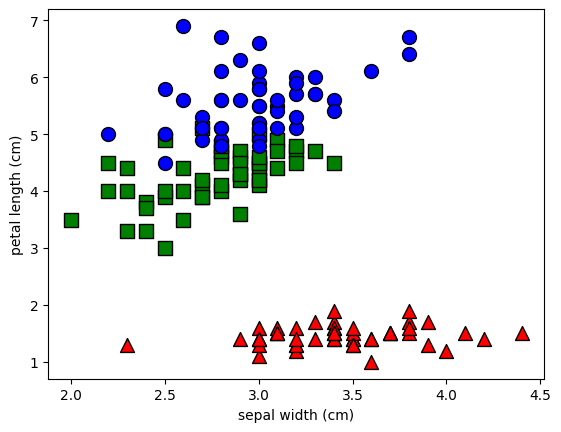

In [316]:
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal length (cm)')
plot_points(features4, labels)

### Sepal Width vs. Petal Width


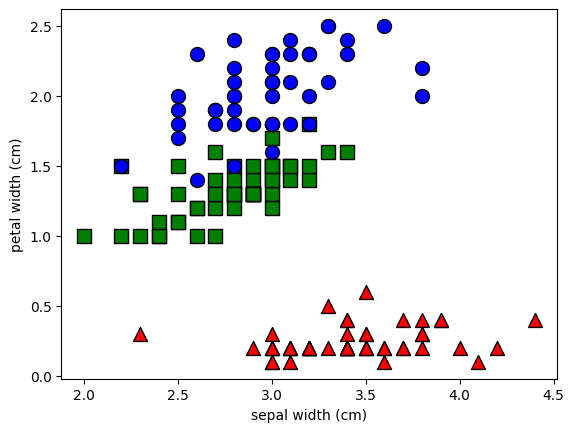

In [317]:
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal width (cm)')
plot_points(features5, labels)

### Petal Length vs Petal Width

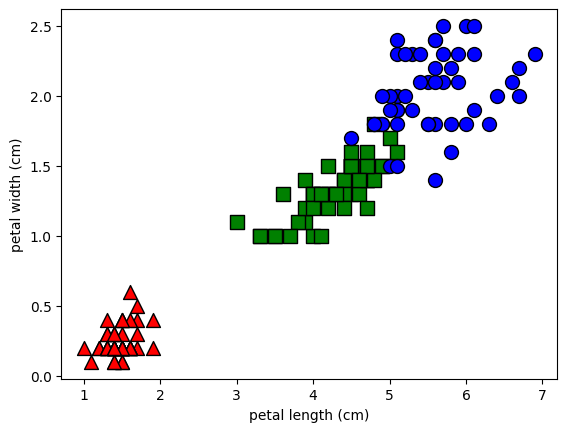

In [318]:
pyplot.xlabel('petal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_points(features6, labels)

## Building Decision Tree Using Gini Index

### Sepal Length vs. Sepal Width

In [319]:
# Create and train the decision tree classifier
decision_tree1 = DecisionTreeClassifier()
decision_tree1.fit(features1, labels)
decision_tree1.score(features1, labels)

0.9266666666666666

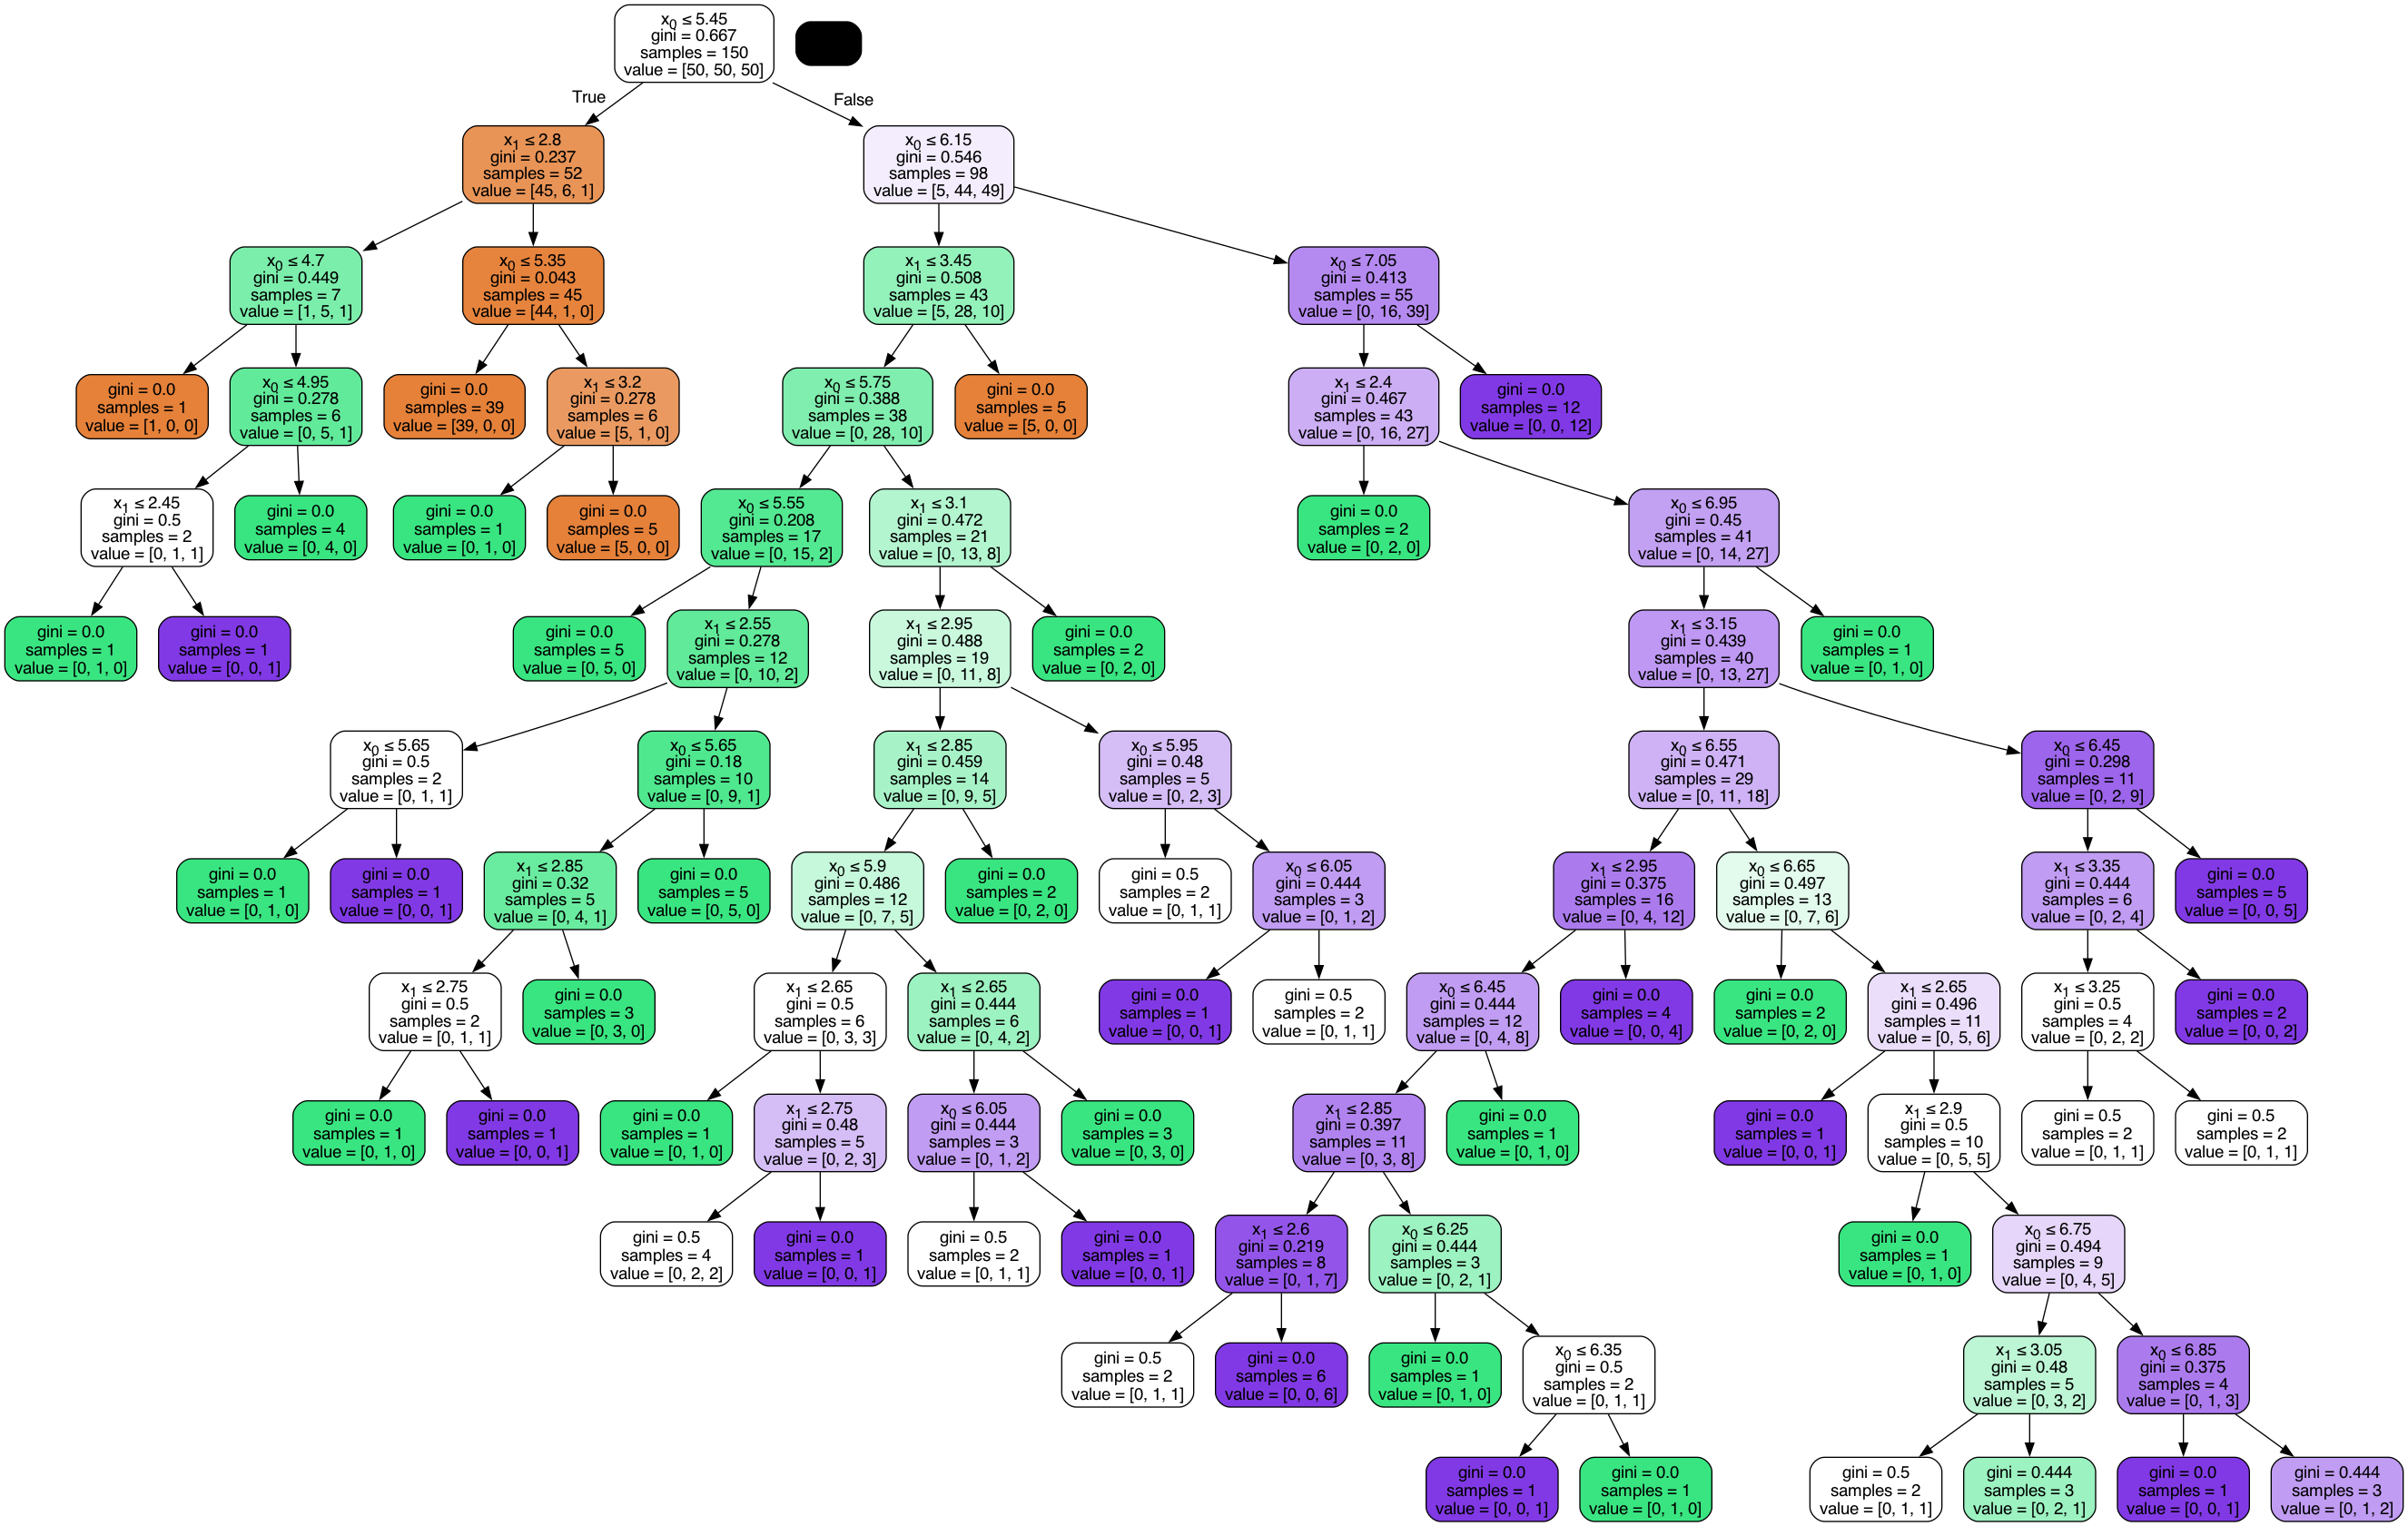

In [320]:
display_tree(decision_tree1)

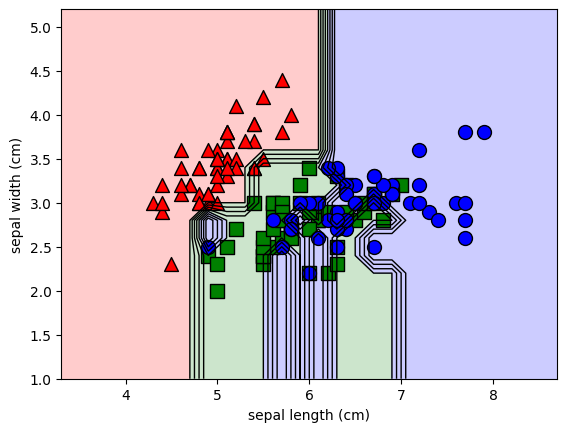

In [321]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('sepal width (cm)')
plot_model(features1, labels, decision_tree1)

### Sepal Length vs. Petal Length

In [322]:
# Create and train the decision tree classifier
decision_tree2 = DecisionTreeClassifier()
decision_tree2.fit(features2, labels)
decision_tree2.score(features2, labels)

0.9933333333333333

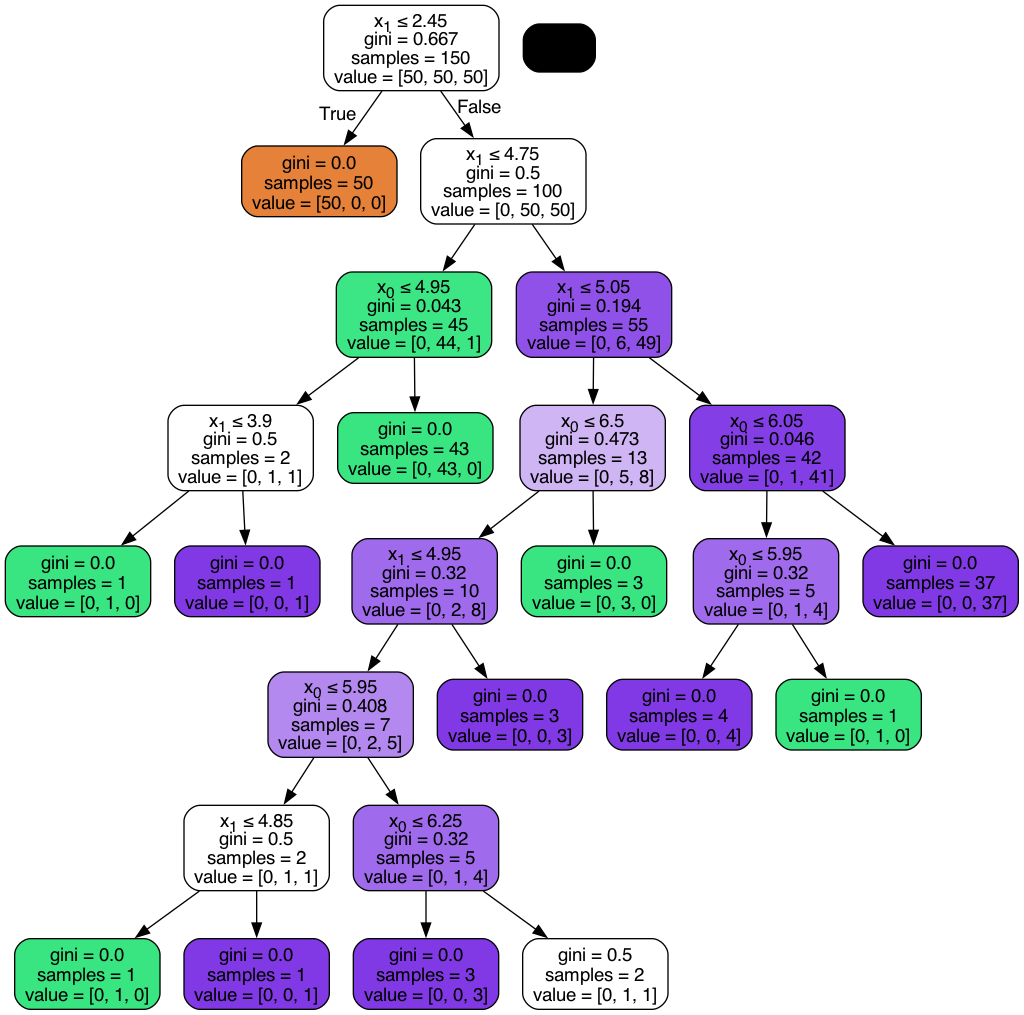

In [323]:
display_tree(decision_tree2)

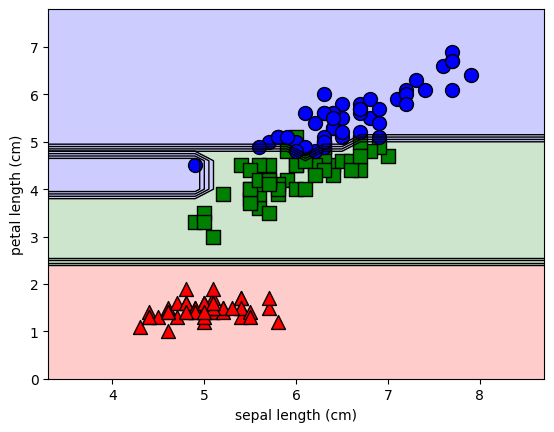

In [324]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features2, labels, decision_tree2)

### Sepal Length vs. Petal Wdith

In [325]:
# Create and train the decision tree classifier
decision_tree3 = DecisionTreeClassifier()
decision_tree3.fit(features3, labels)
decision_tree3.score(features3, labels)

0.9733333333333334

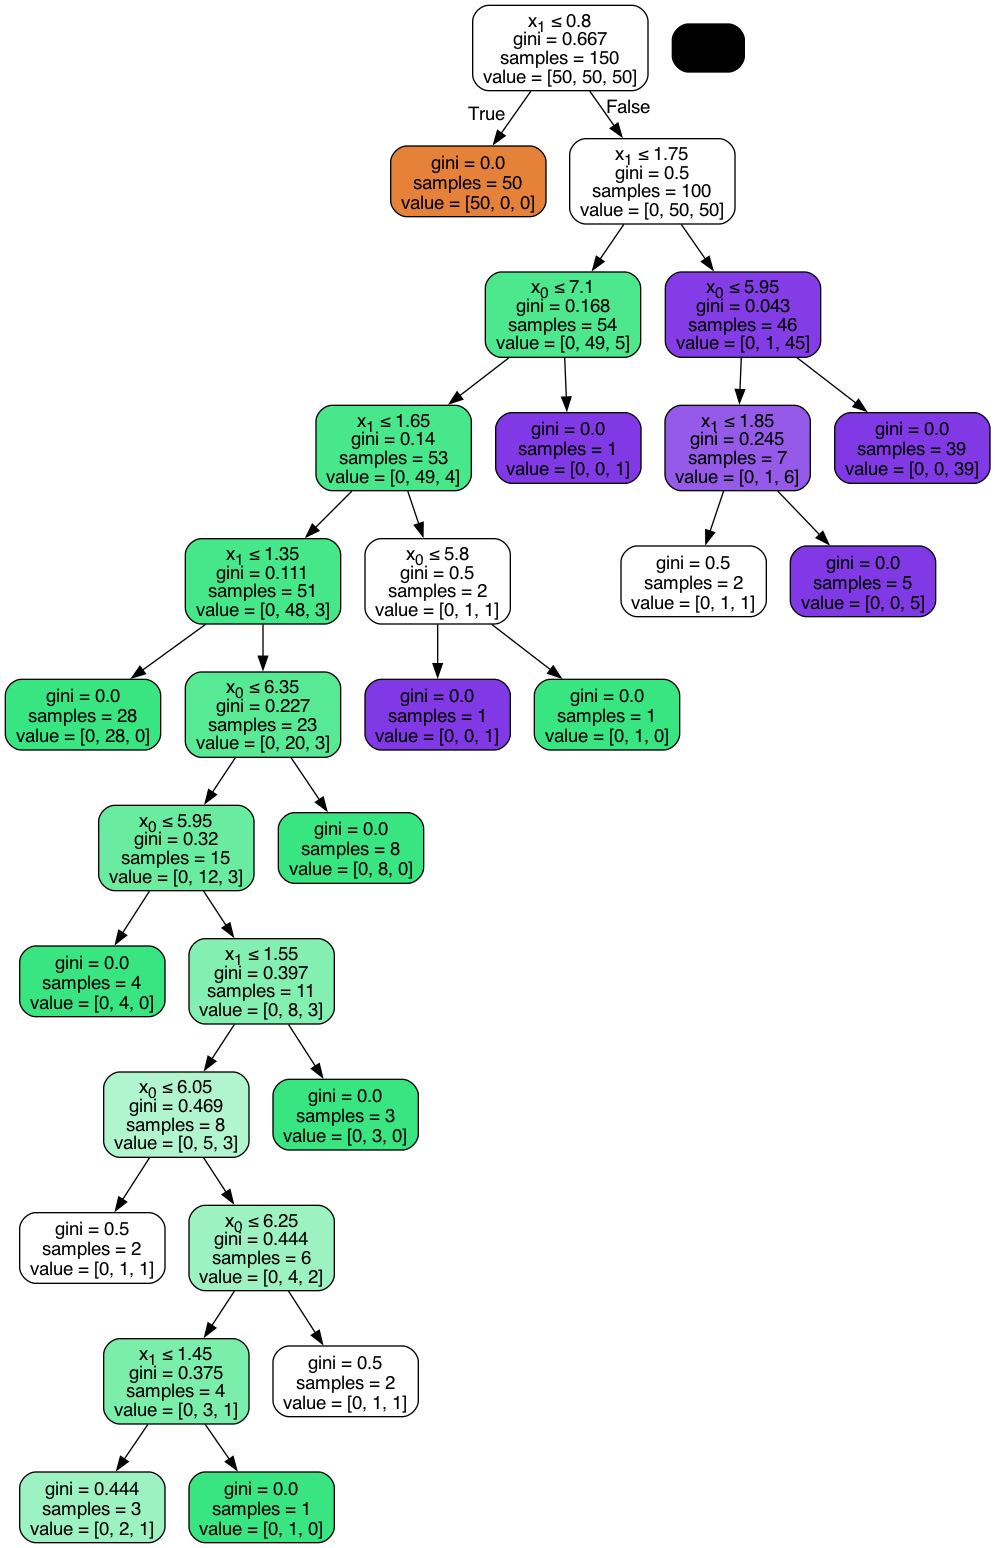

In [326]:
display_tree(decision_tree3)

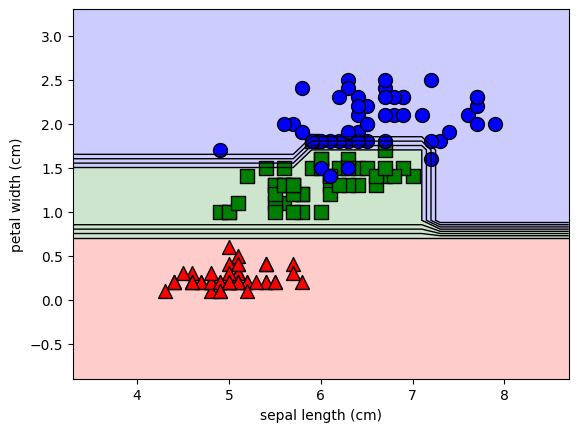

In [327]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features3, labels, decision_tree3)

### Sepal Width vs. Petal Length

In [328]:
# Create and train the decision tree classifier
decision_tree4 = DecisionTreeClassifier()
decision_tree4.fit(features4, labels)
decision_tree4.score(features4, labels)

0.9866666666666667

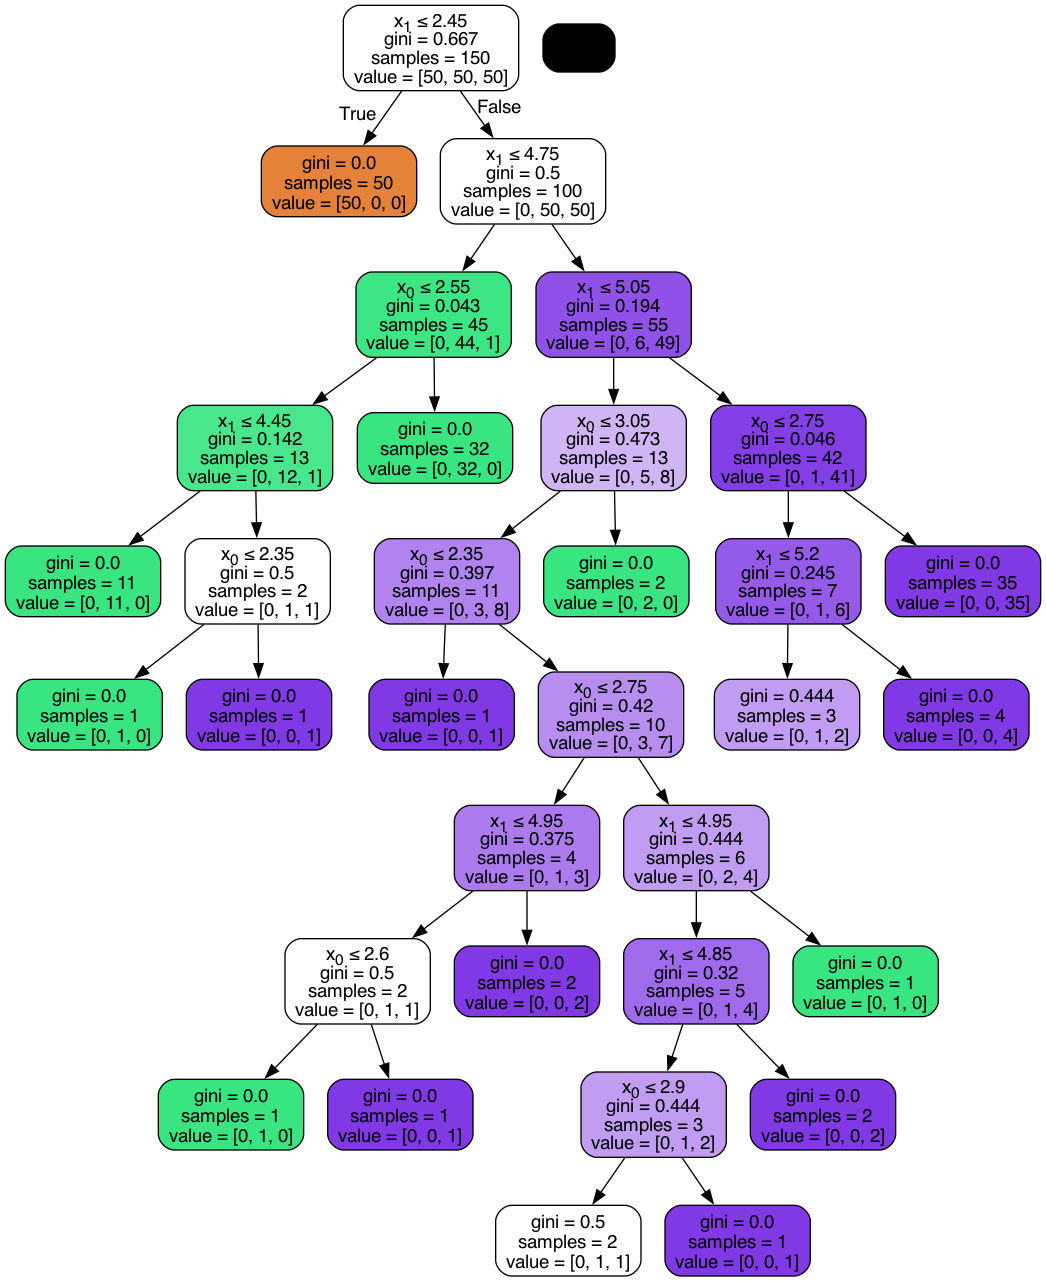

In [329]:
display_tree(decision_tree4)

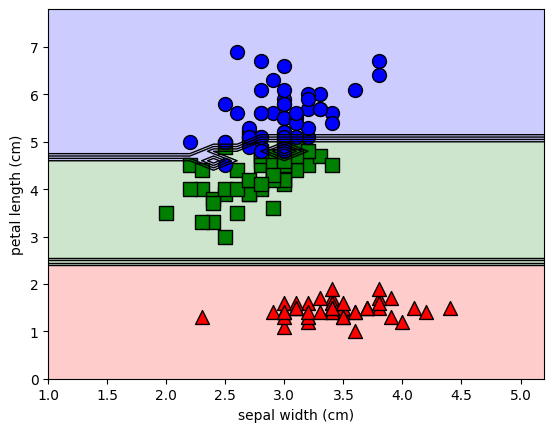

In [330]:
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features4, labels, decision_tree4)

### Sepal Width vs. Petal Width

In [331]:
# Create and train the decision tree classifier
decision_tree5 = DecisionTreeClassifier()
decision_tree5.fit(features5, labels)
decision_tree5.score(features5, labels)

0.98

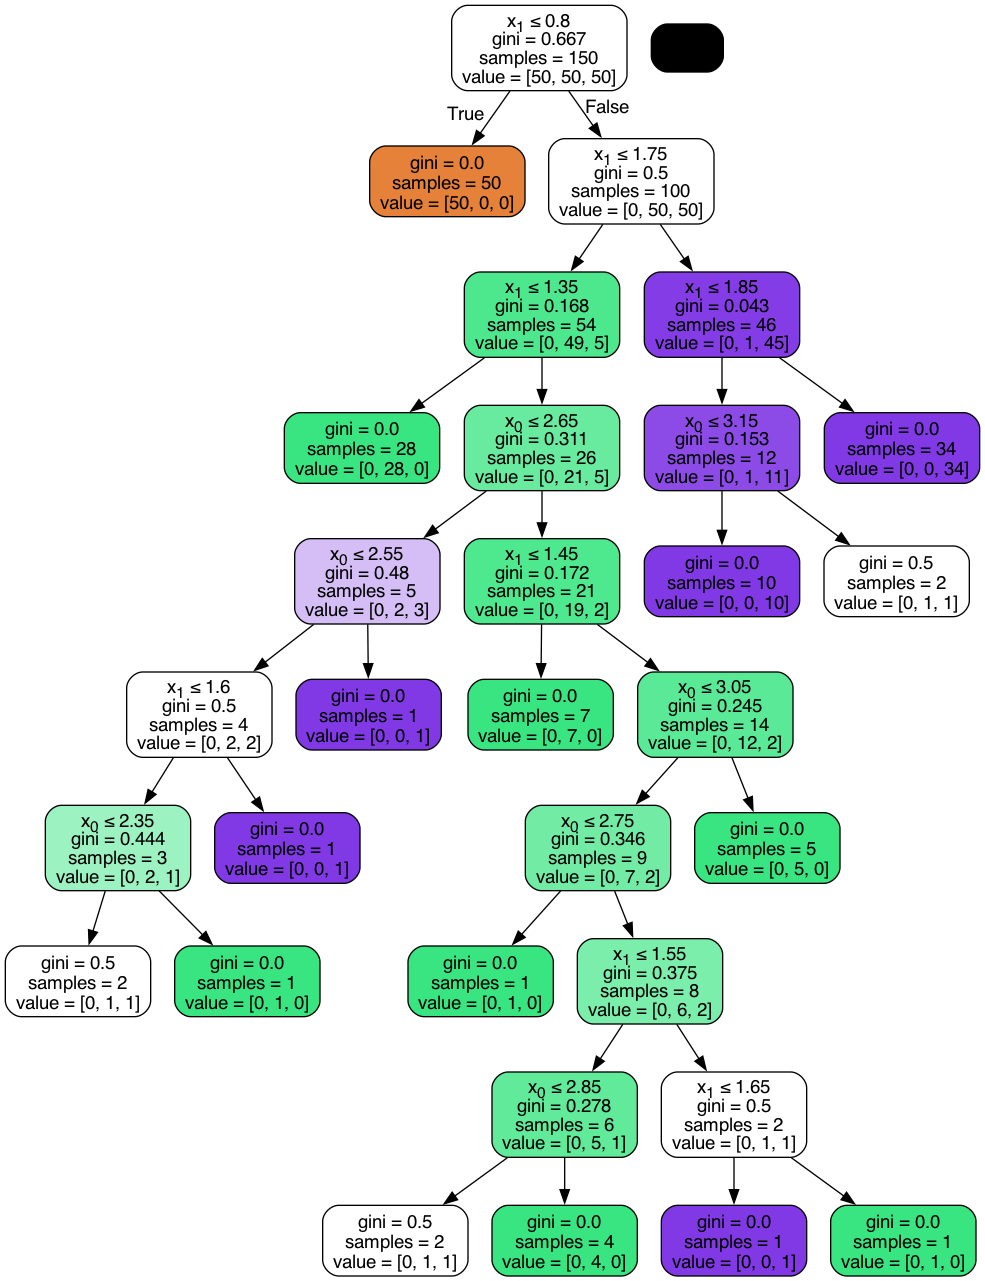

In [332]:
display_tree(decision_tree5)

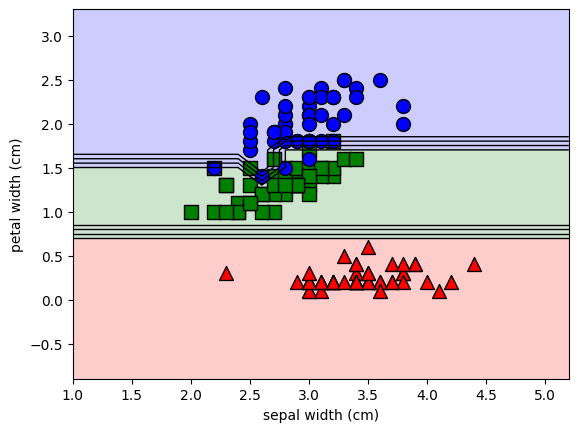

In [333]:
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features5, labels, decision_tree5)

### Pedal Length vs. Pedal Width

In [334]:
# Create and train the decision tree classifier
decision_tree6 = DecisionTreeClassifier()
decision_tree6.fit(features6, labels)
decision_tree6.score(features6, labels)

0.9933333333333333

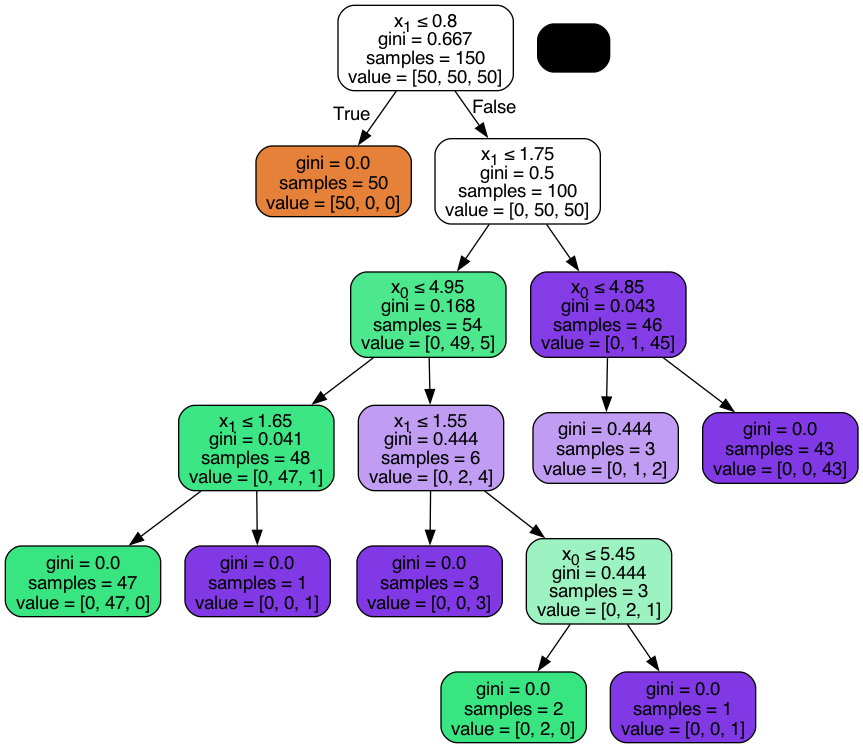

In [335]:
display_tree(decision_tree6)

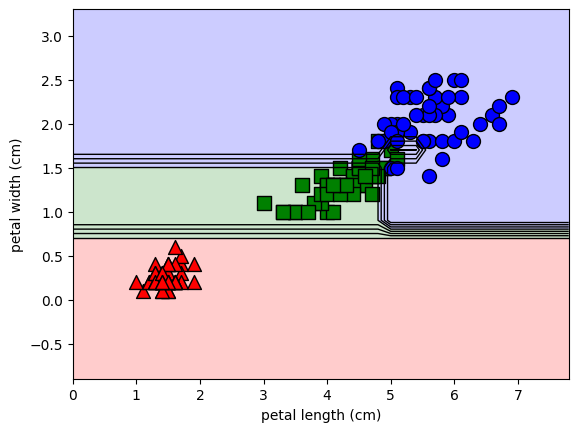

In [336]:
pyplot.xlabel('petal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features6, labels, decision_tree6)

## Build Decision Tree Using Entropy


### Sepal Length vs. Sepal Width

In [337]:
decision_tree_entropy1 = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy1.fit(features1, labels)
decision_tree_entropy1.score(features1, labels)

0.9266666666666666

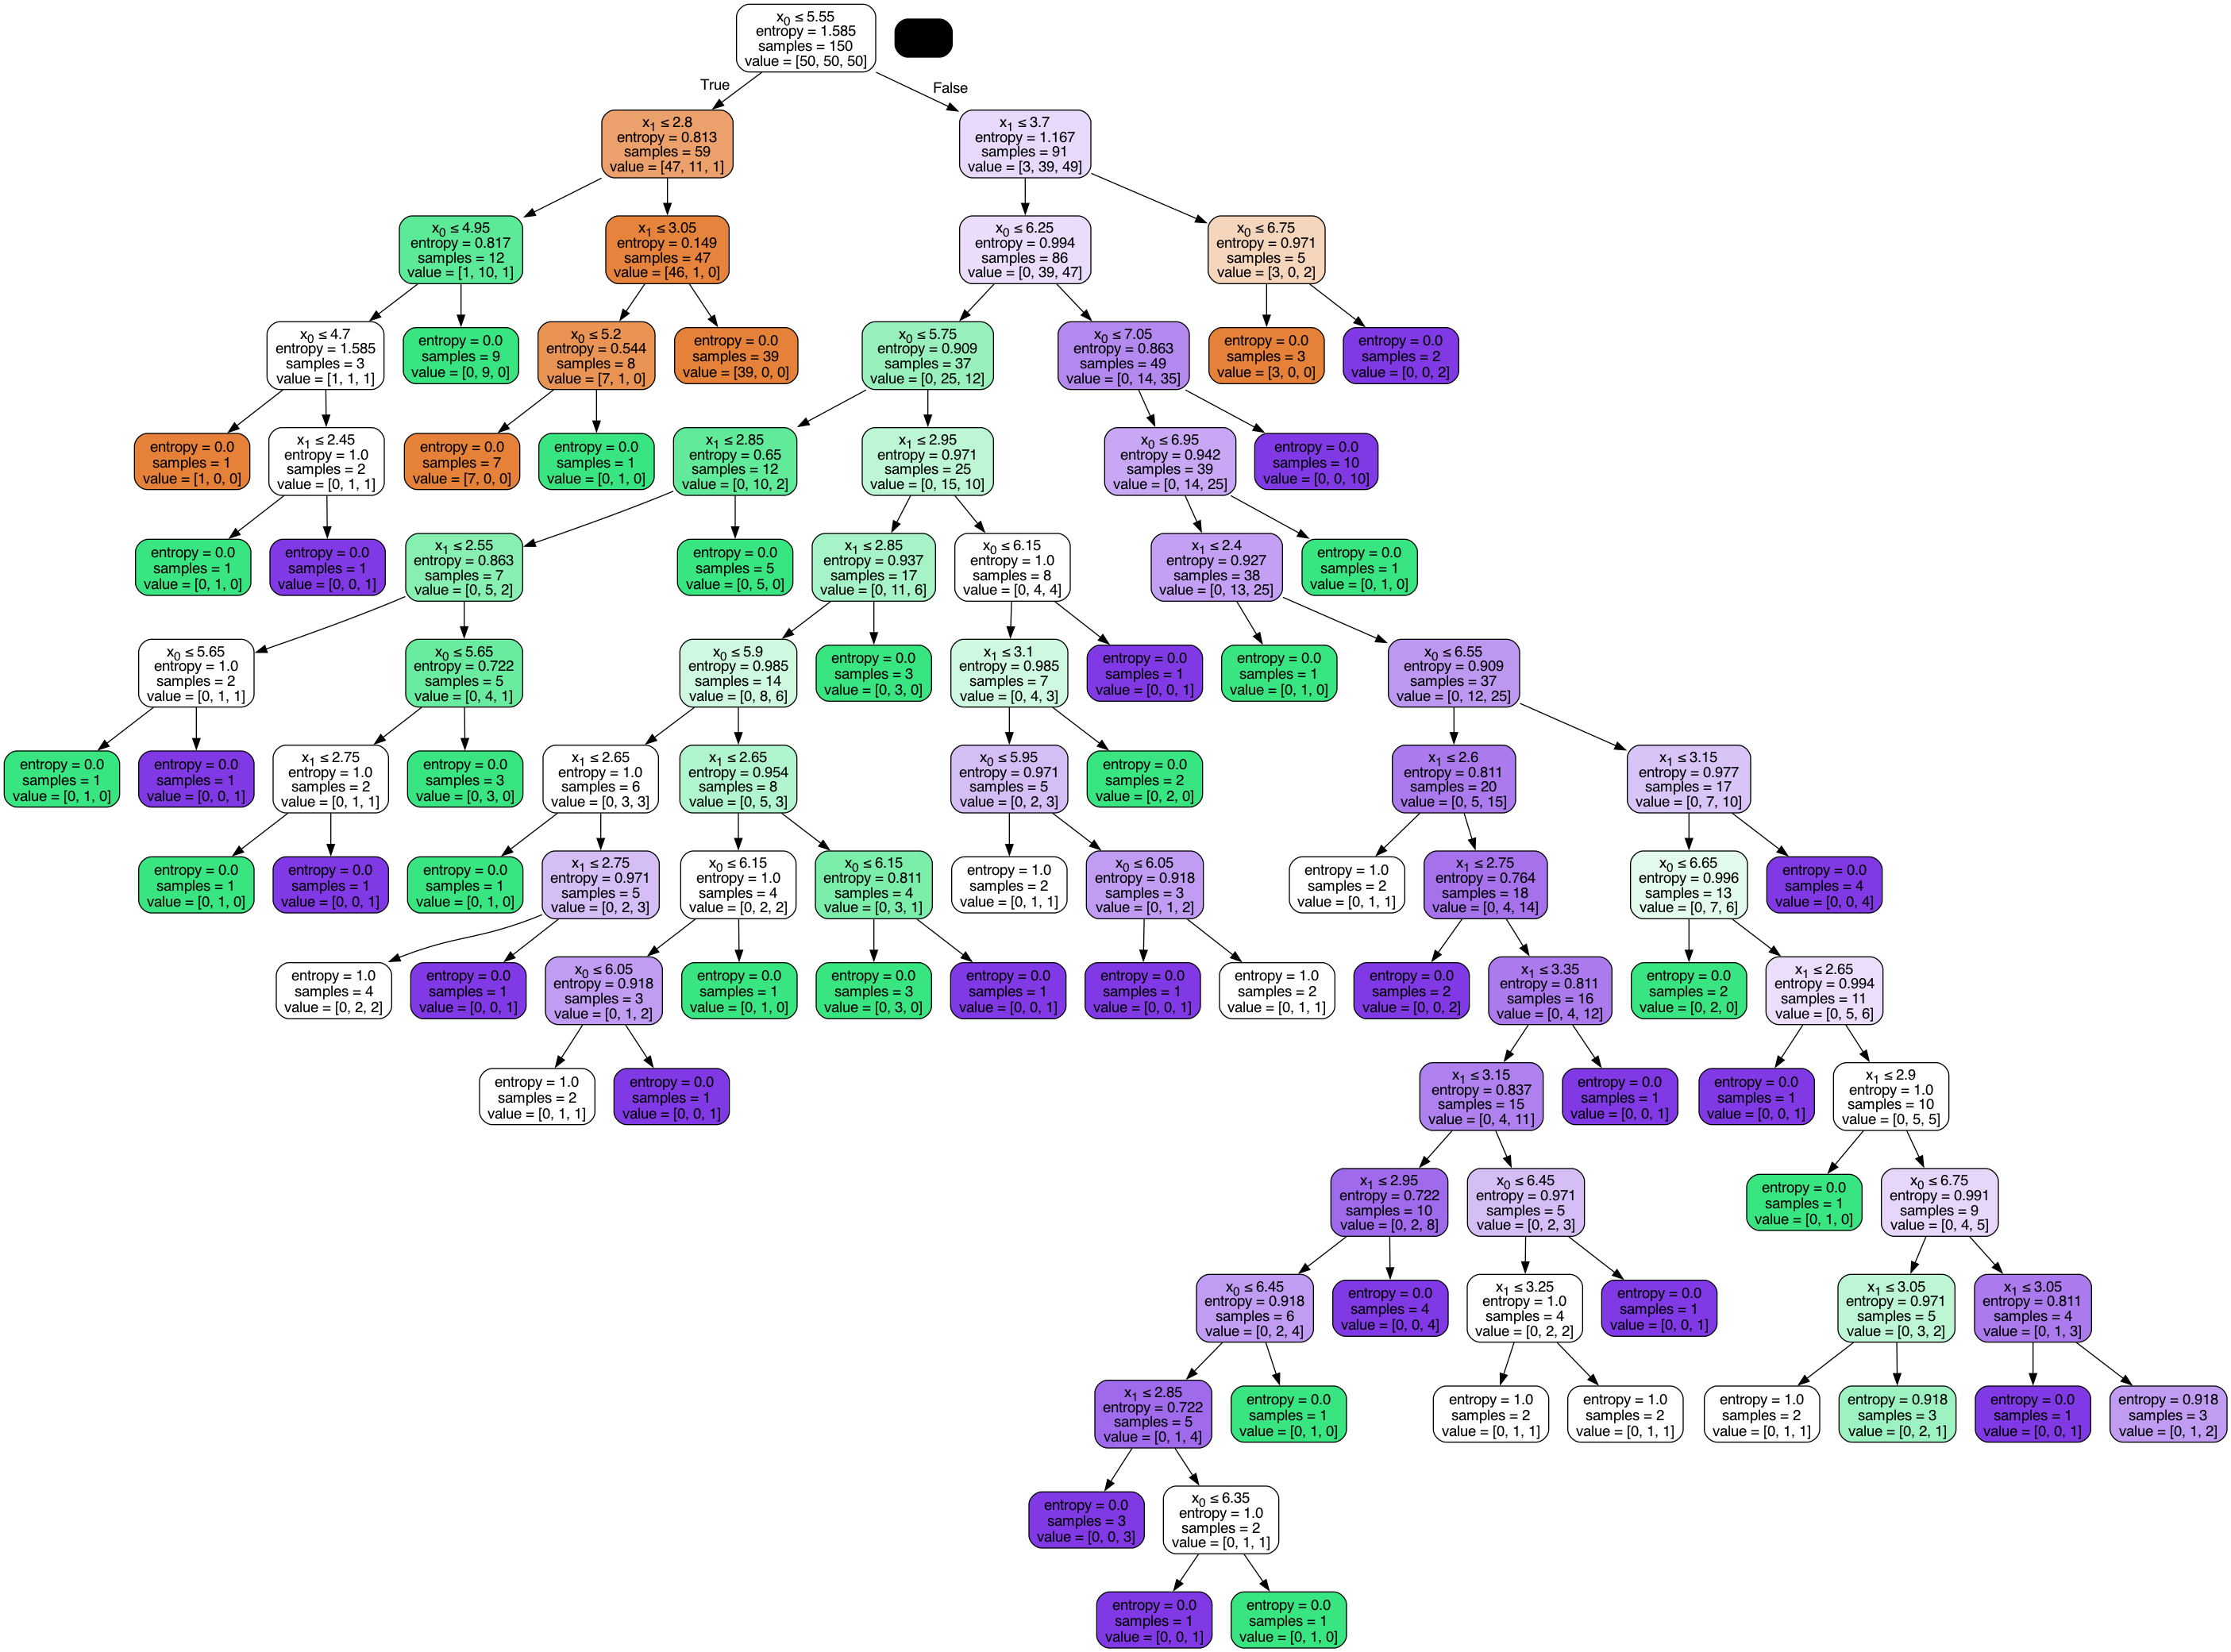

In [338]:
display_tree(decision_tree_entropy1)

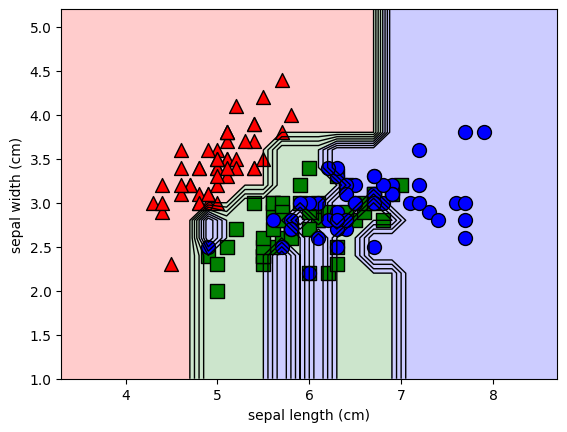

In [339]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('sepal width (cm)')
plot_model(features1, labels, decision_tree_entropy1)

### Sepal Length vs. Petal Length

In [340]:
decision_tree_entropy2 = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy2.fit(features2, labels)
decision_tree_entropy2.score(features2, labels)

0.9933333333333333

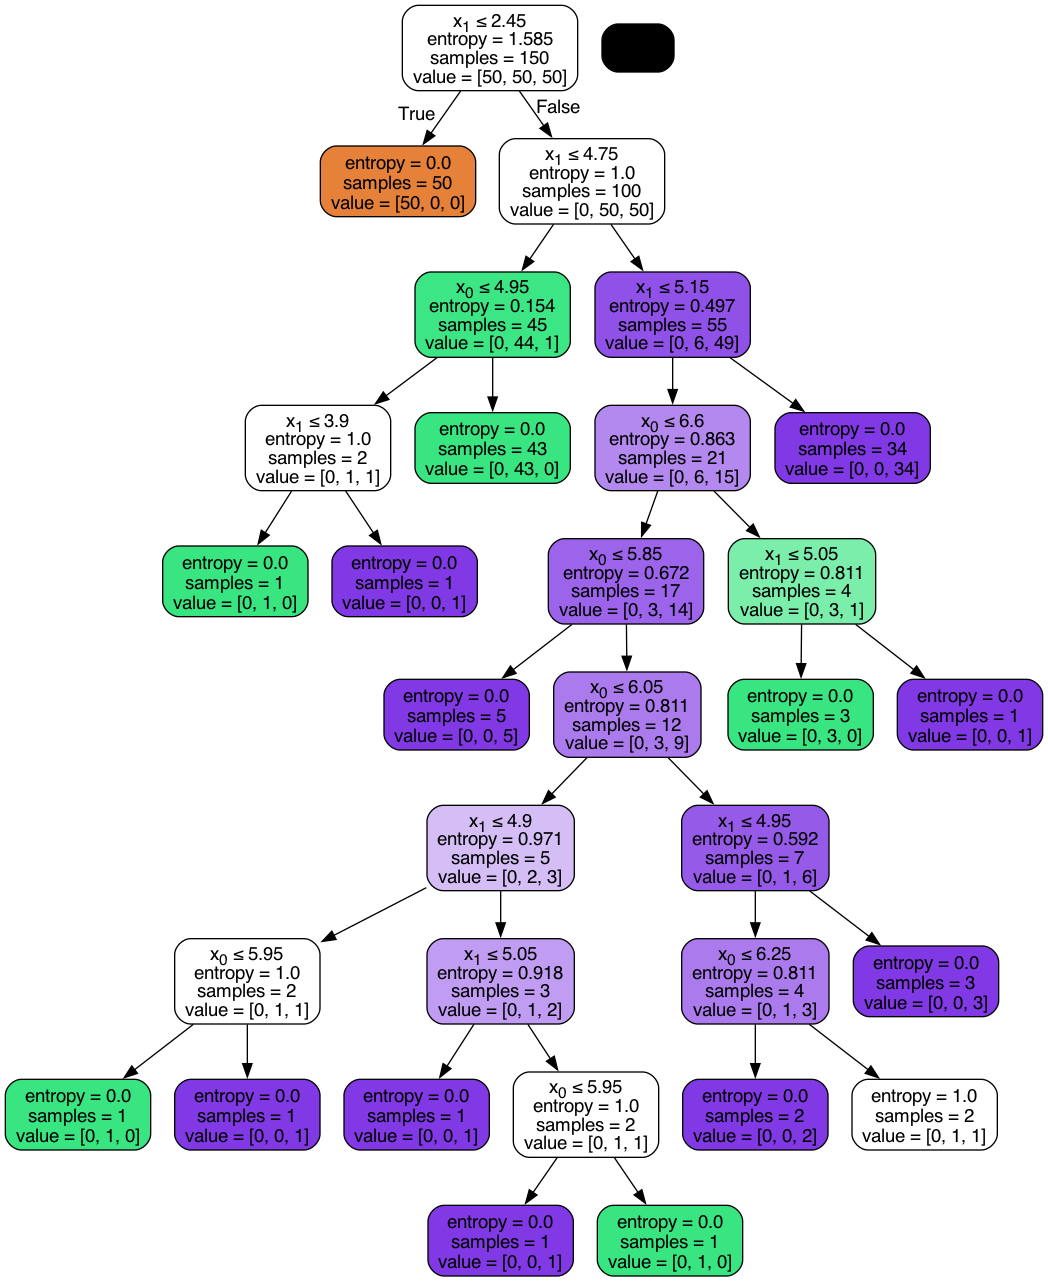

In [341]:
display_tree(decision_tree_entropy2)

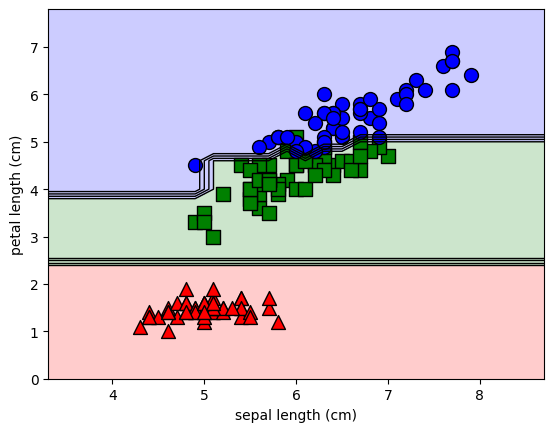

In [342]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features2, labels, decision_tree_entropy2)

### Sepal Length vs. Petal Wdith

In [343]:
decision_tree_entropy3 = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy3.fit(features3, labels)
decision_tree_entropy3.score(features3, labels)

0.9733333333333334

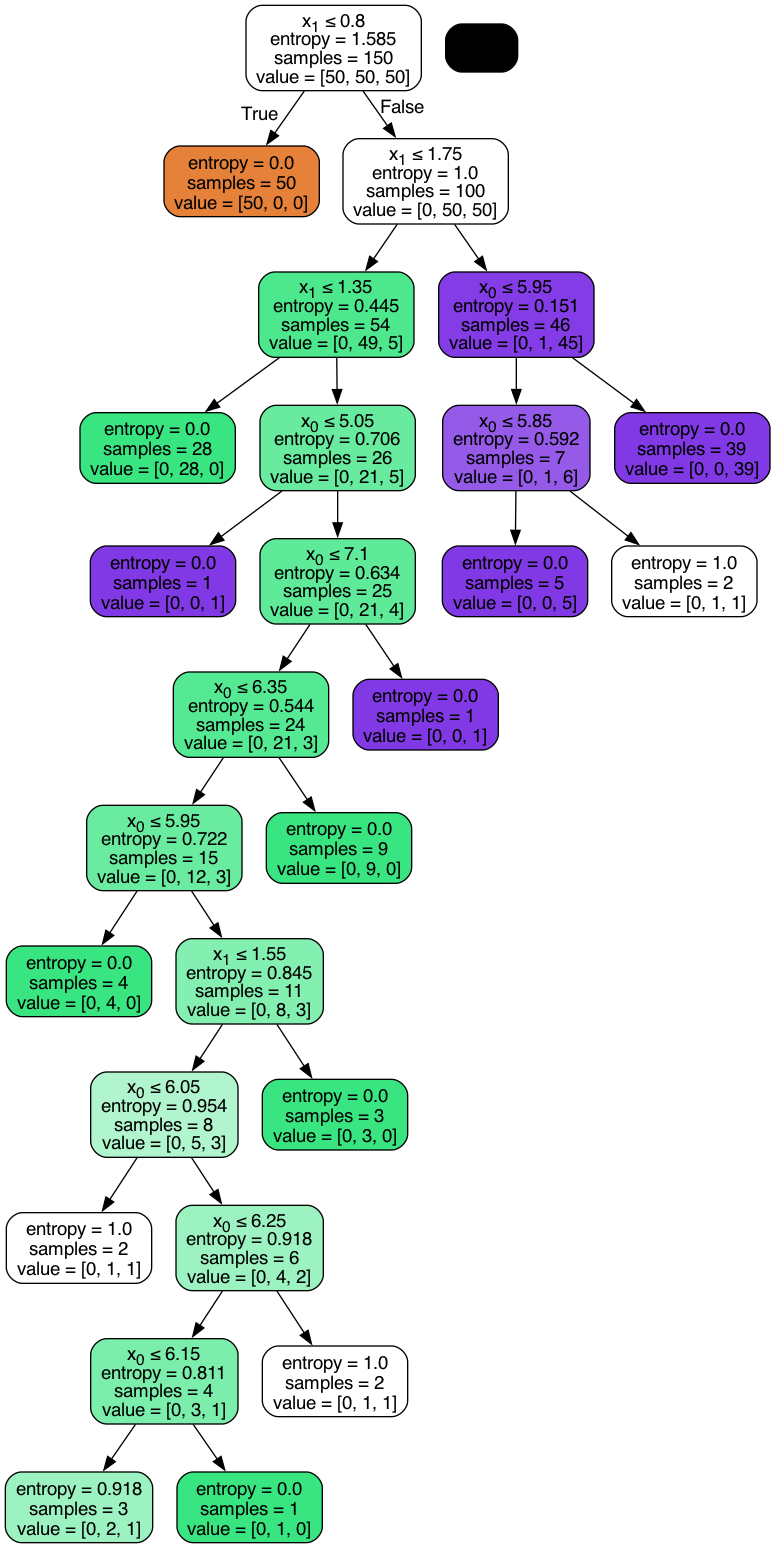

In [344]:
display_tree(decision_tree_entropy3)

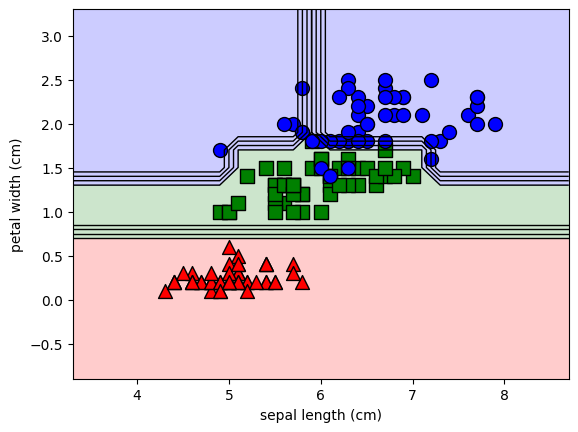

In [345]:
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features3, labels, decision_tree_entropy3)

### Sepal Width vs. Petal Length

In [346]:
decision_tree_entropy4 = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy4.fit(features4, labels)
decision_tree_entropy4.score(features4, labels)

0.9866666666666667

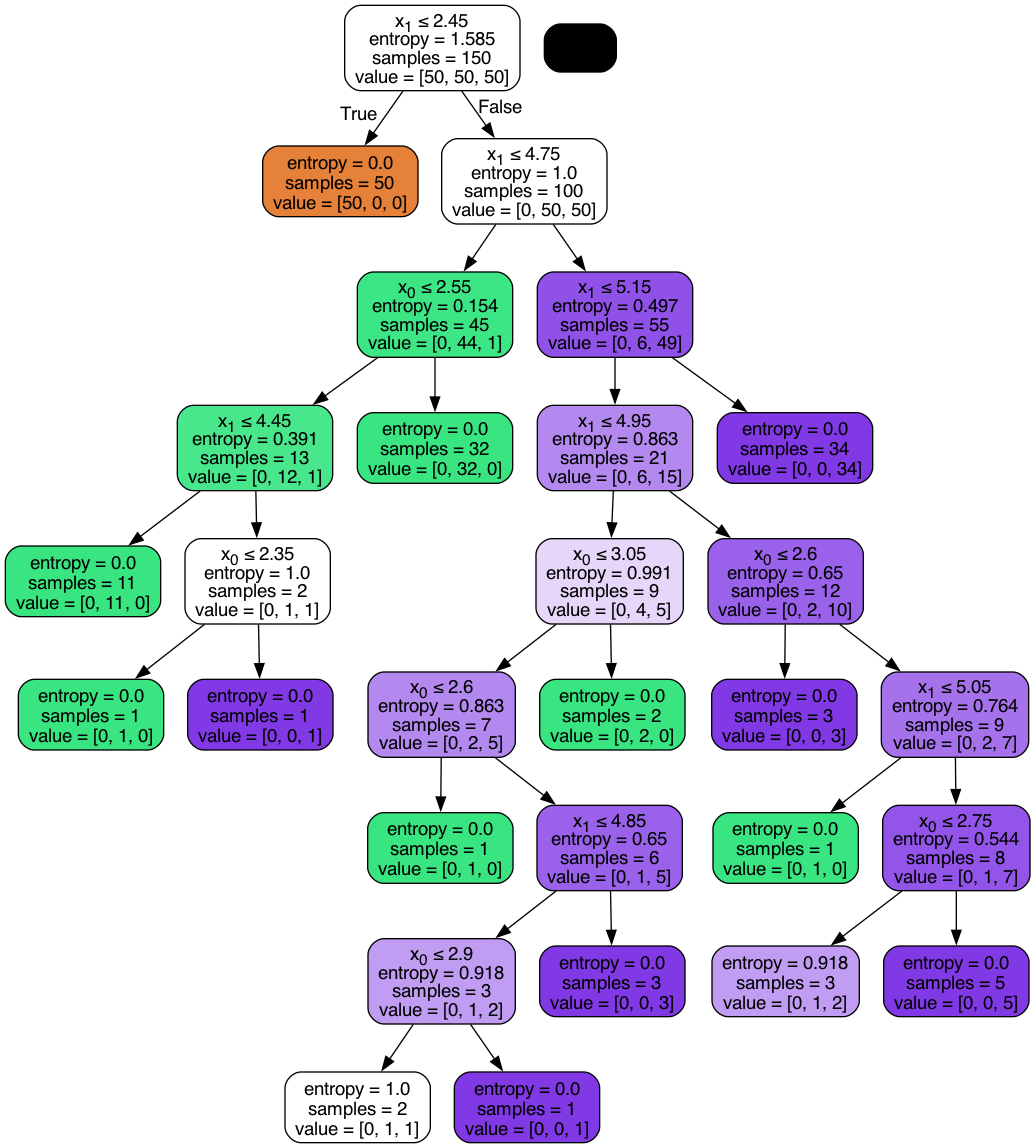

In [347]:
display_tree(decision_tree_entropy4)

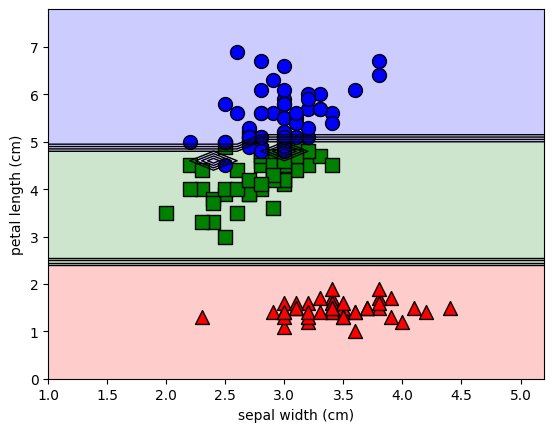

In [348]:
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features4, labels, decision_tree_entropy4)

### Sepal Width vs. Petal Width

In [349]:
decision_tree_entropy5 = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy5.fit(features5, labels)
decision_tree_entropy5.score(features5, labels)

0.98

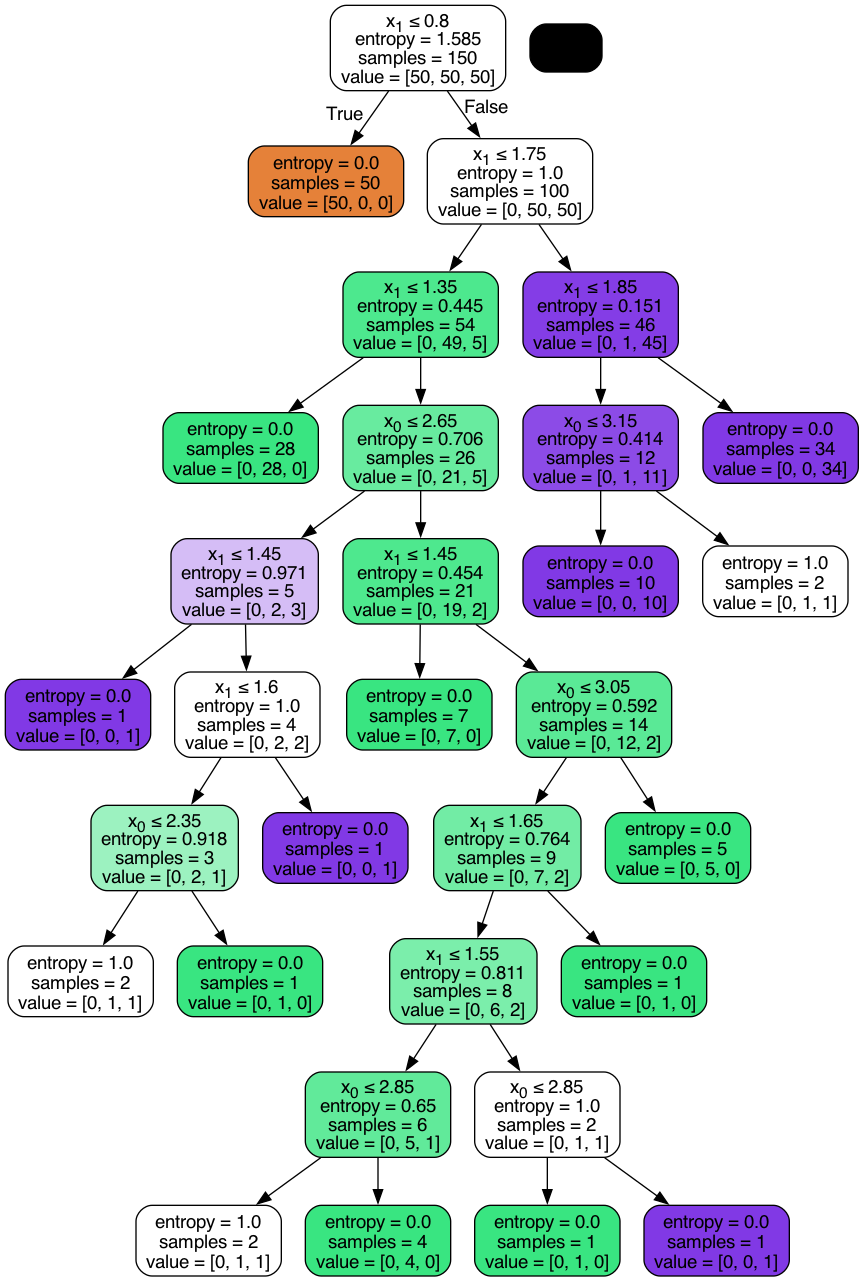

In [350]:
display_tree(decision_tree_entropy5)

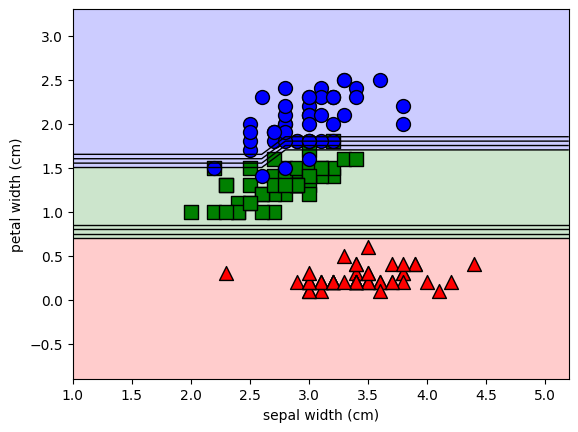

In [351]:
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features5, labels, decision_tree_entropy5)

### Pedal Length vs. Pedal Width

In [352]:
decision_tree_entropy6 = DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy6.fit(features6, labels)
decision_tree_entropy6.score(features6, labels)

0.9933333333333333

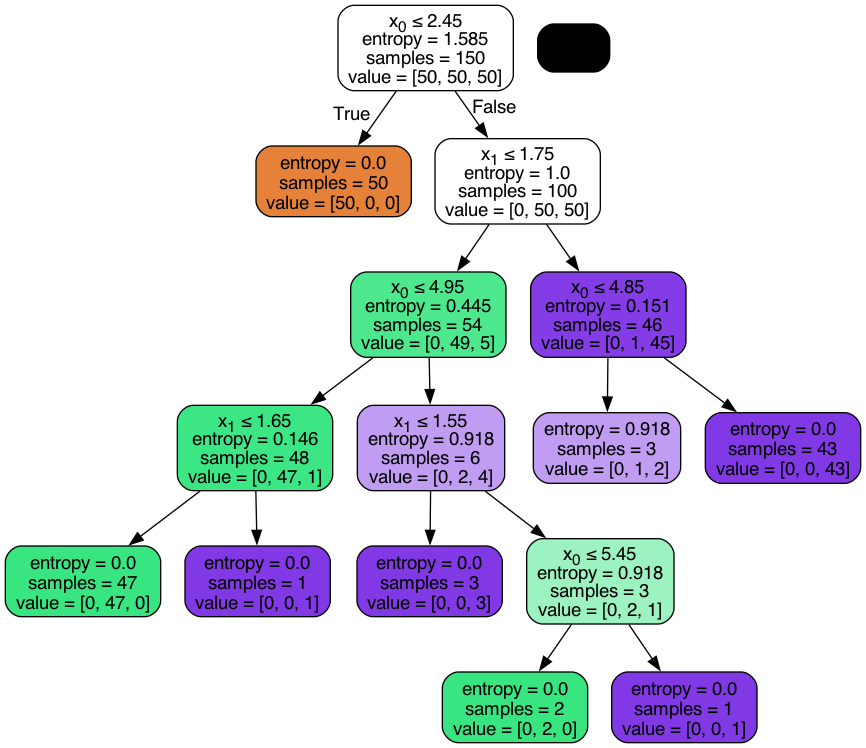

In [353]:
display_tree(decision_tree_entropy6)

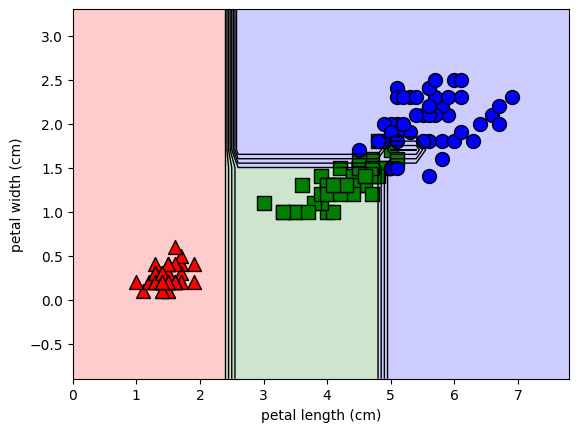

In [354]:
pyplot.xlabel('petal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features6, labels, decision_tree_entropy6)

## Building a Decision Tree of Depth One

### Sepal Length vs. Sepal Width

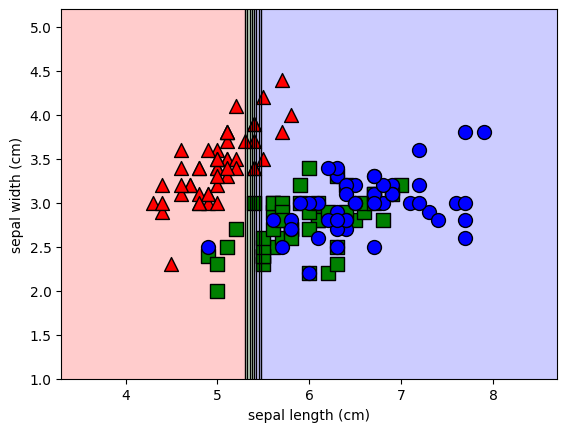

In [355]:
decision_tree1_depth1 = DecisionTreeClassifier(max_depth=1)
decision_tree1_depth1.fit(features1, labels)
decision_tree1_depth1.score(features1, labels)
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('sepal width (cm)')
plot_model(features1, labels, decision_tree1_depth1)


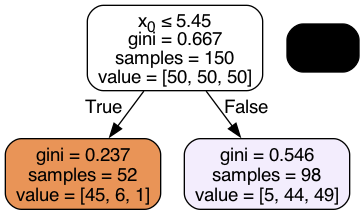

In [356]:
display_tree(decision_tree1_depth1)

### Sepal Length vs. Petal Length

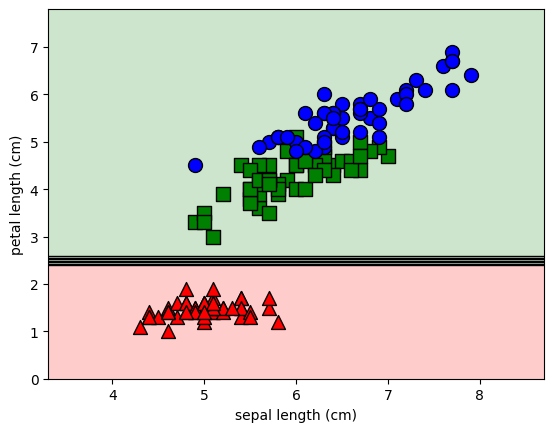

In [357]:
decision_tree2_depth1 = DecisionTreeClassifier(max_depth=1)
decision_tree2_depth1.fit(features2, labels)
decision_tree2_depth1.score(features2, labels)
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features2, labels, decision_tree2_depth1)


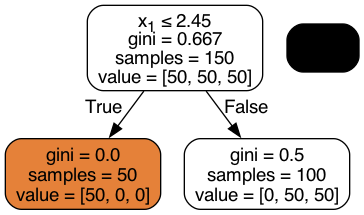

In [358]:
display_tree(decision_tree2_depth1)

### Sepal Length vs. Petal Wdith

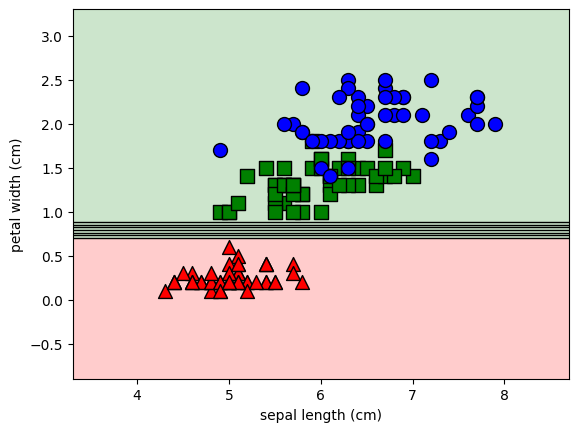

In [359]:
decision_tree3_depth1 = DecisionTreeClassifier(max_depth=1)
decision_tree3_depth1.fit(features3, labels)
decision_tree3_depth1.score(features3, labels)
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features3, labels, decision_tree3_depth1)


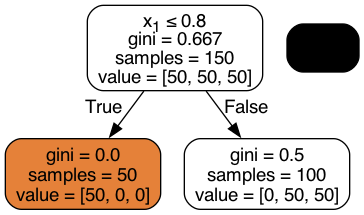

In [360]:
display_tree(decision_tree3_depth1)

### Sepal Width vs. Petal Length

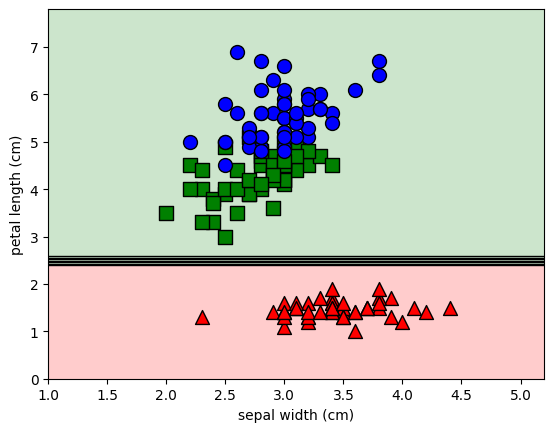

In [361]:
decision_tree4_depth1 = DecisionTreeClassifier(max_depth=1)
decision_tree4_depth1.fit(features4, labels)
decision_tree4_depth1.score(features4, labels)
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features4, labels, decision_tree4_depth1)


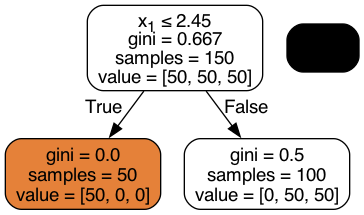

In [362]:
display_tree(decision_tree4_depth1)

### Sepal Width vs. Petal Width

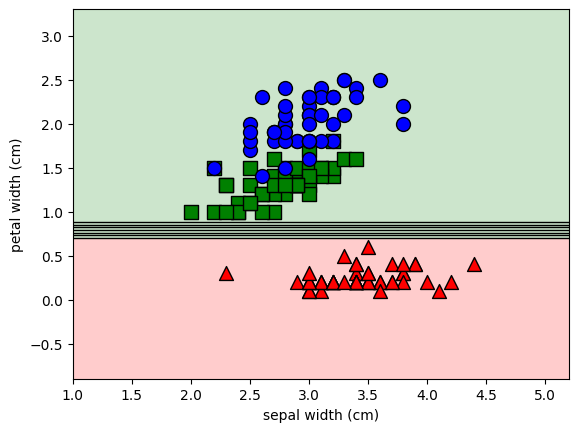

In [363]:
decision_tree5_depth1 = DecisionTreeClassifier(max_depth=1)
decision_tree5_depth1.fit(features5, labels)
decision_tree5_depth1.score(features5, labels)
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features5, labels, decision_tree5_depth1)


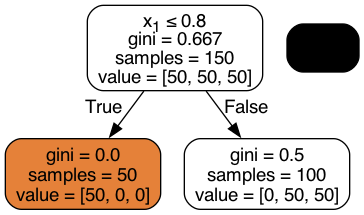

In [364]:
display_tree(decision_tree5_depth1)

### Petal Length vs. Petal Width

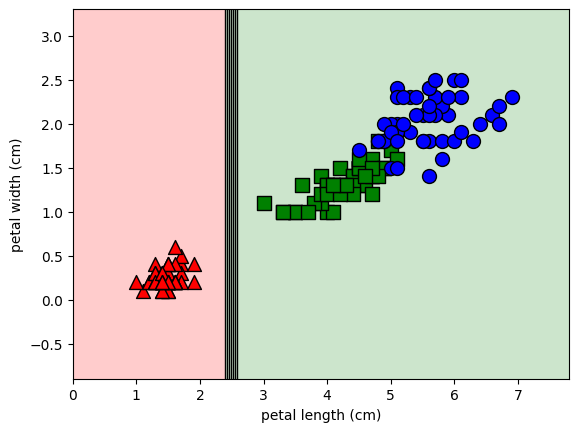

In [365]:
decision_tree6_depth1 = DecisionTreeClassifier(max_depth=1)
decision_tree6_depth1.fit(features6, labels)
decision_tree6_depth1.score(features6, labels)
pyplot.xlabel('petal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features6, labels, decision_tree6_depth1)


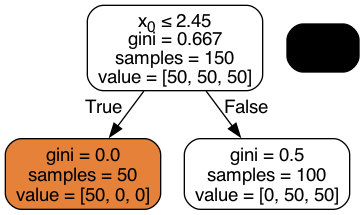

In [366]:
display_tree(decision_tree6_depth1)

## Building a Decision Tree of Depth Two

### Sepal Length vs. Sepal Width

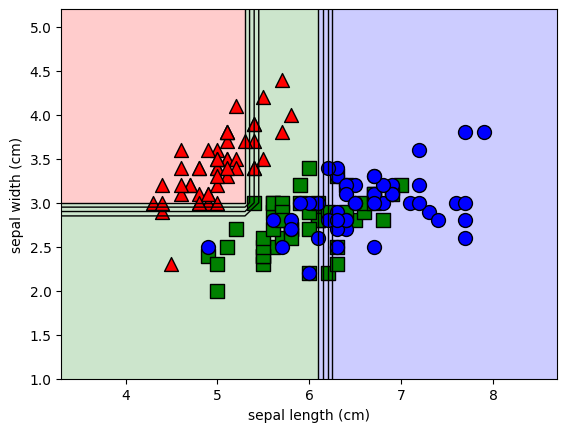

In [367]:
decision_tree1_depth2 = DecisionTreeClassifier(max_depth=2)
decision_tree1_depth2.fit(features1, labels)
decision_tree1_depth2.score(features1, labels)
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('sepal width (cm)')
plot_model(features1, labels, decision_tree1_depth2)


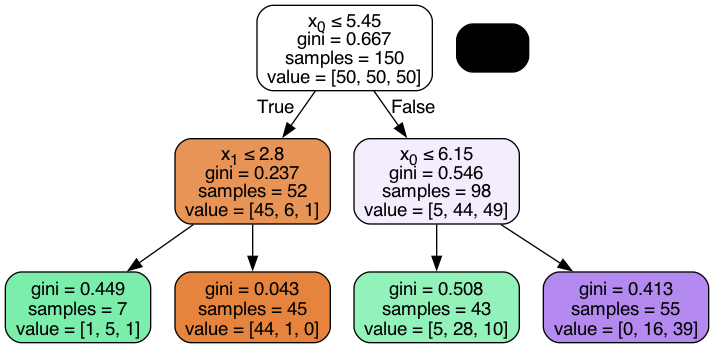

In [368]:
display_tree(decision_tree1_depth2)

### Sepal Length vs. Petal Length

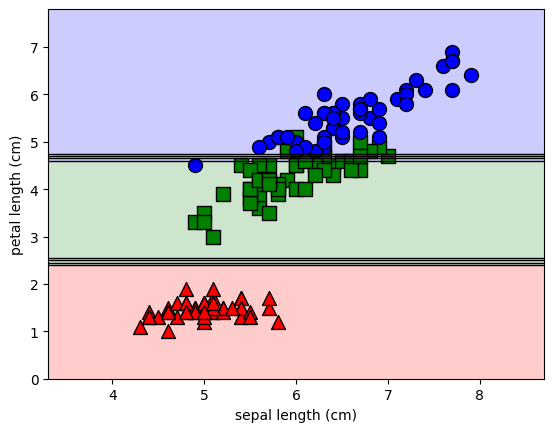

In [369]:
decision_tree2_depth2 = DecisionTreeClassifier(max_depth=2)
decision_tree2_depth2.fit(features2, labels)
decision_tree2_depth2.score(features2, labels)
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features2, labels, decision_tree2_depth2)


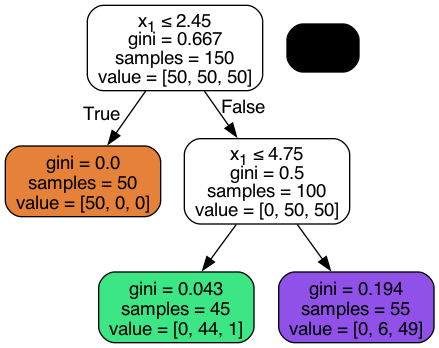

In [370]:
display_tree(decision_tree2_depth2)

### Sepal Length vs. Petal Width

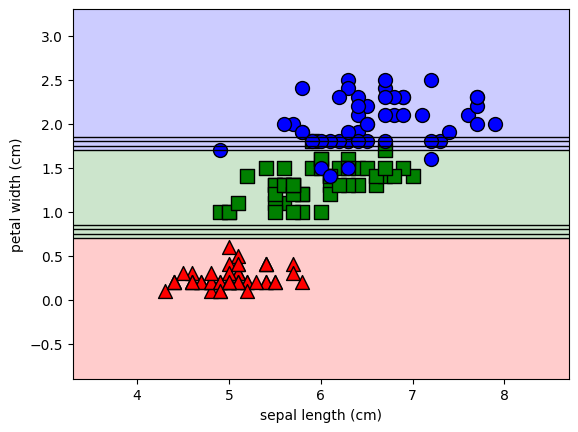

In [379]:
decision_tree3_depth2 = DecisionTreeClassifier(max_depth=2)
decision_tree3_depth2.fit(features3, labels)
decision_tree3_depth2.score(features3, labels)
pyplot.xlabel('sepal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features3, labels, decision_tree3_depth2)


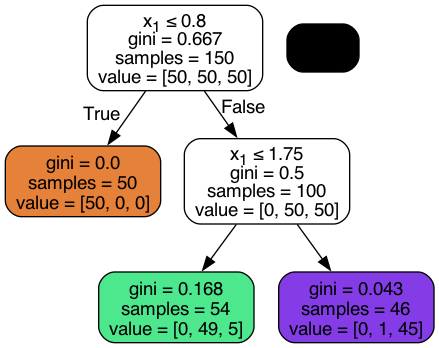

In [372]:
display_tree(decision_tree3_depth2)

### Sepal Width vs. Petal Length

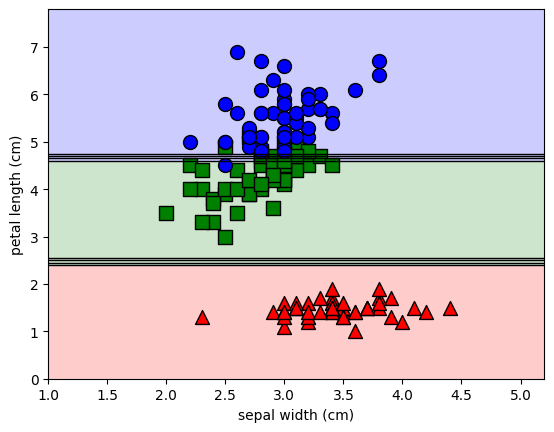

In [373]:
decision_tree4_depth2 = DecisionTreeClassifier(max_depth=2)
decision_tree4_depth2.fit(features4, labels)
decision_tree4_depth2.score(features4, labels)
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal length (cm)')
plot_model(features4, labels, decision_tree4_depth2)


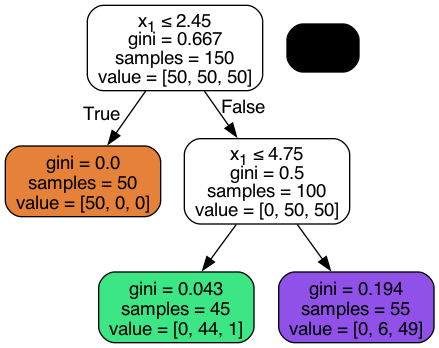

In [374]:
display_tree(decision_tree4_depth2)

### Sepal Width vs. Petal Width

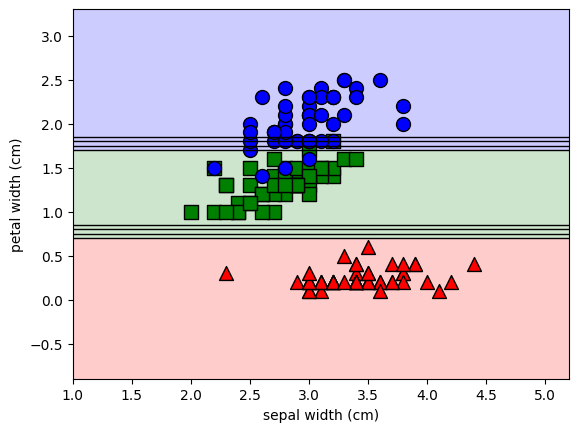

In [375]:
decision_tree5_depth2 = DecisionTreeClassifier(max_depth=2)
decision_tree5_depth2.fit(features5, labels)
decision_tree5_depth2.score(features5, labels)
pyplot.xlabel('sepal width (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features5, labels, decision_tree5_depth2)


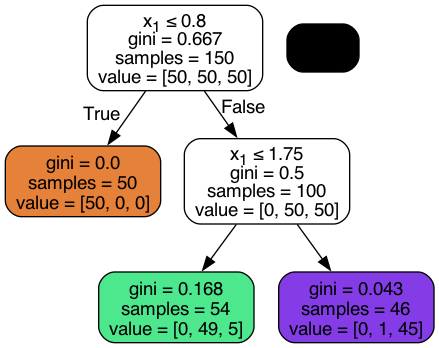

In [376]:
display_tree(decision_tree5_depth2)

### Petal Length vs. Petal Width

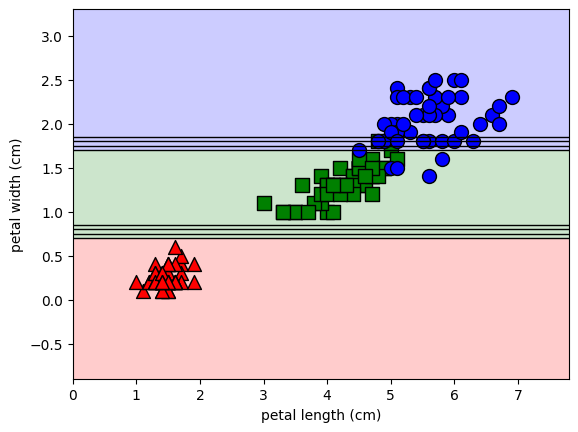

In [377]:
decision_tree6_depth2 = DecisionTreeClassifier(max_depth=2)
decision_tree6_depth2.fit(features6, labels)
decision_tree6_depth2.score(features6, labels)
pyplot.xlabel('petal length (cm)')
pyplot.ylabel('petal width (cm)')
plot_model(features6, labels, decision_tree6_depth2)


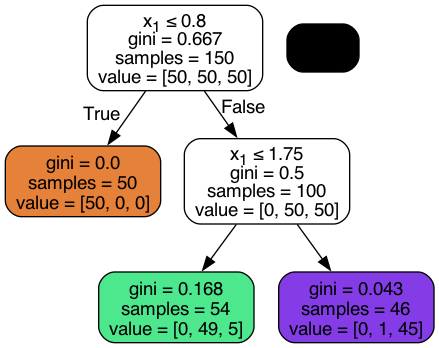

In [378]:
display_tree(decision_tree6_depth2)